# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** ZIDAN DWI PERMANA
- **Email:** zidandwipermana01@gmail.com
- **ID Dicoding:** zixuan

## Menentukan Pertanyaan Bisnis

- Musim apa yang mencatat jumlah rata-rata penyewaan sepeda perhari tertinggi dan terendah?
- Bagaimana tren penyewaan sepeda dari bulan dan tahun yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualizations

## Data Wrangling

### Gathering Data


In [2]:
#Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- terlihat data memiliki informasi tanggal, musim, weekday/workday, cuaca, juga suhu dan kondisi angin.

### Assessing Data

In [3]:
# Get information about the dataset structure and check for null values
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
#Mengecek missing value
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
#Mengecek baris duplikat
print("Jumlah data duplikat: " + str(day_df.duplicated().sum()))

Jumlah data duplikat: 0


In [8]:
# Get some summary statistics for numeric columns
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
#### > **Tipe data**
- Tipe data untuk dteday adalah "**object**" sebaiknya diubah menjadi "**datetime**"

#### > **Missing Value**
- Tidak ada missing value, datanya lengkap setiap kolom.

#### > **Data Duplikat**
- Tidak ada duplikasi data

#### > **Ringkasan Statistik**
- Tidak terdapat keanehan, namun perlu diingat bahwa temp, atemp, hum, dan windspeed adalah nilai yang telah dinormalisasi.


Kerena anomali hanya terjadi pada tipe data, maka pada tahap cleaning data saya hanya akan melakukan perubahan untuk tipe data pada dteday saja.

### Cleaning Data

In [9]:
# Mengubah kolom 'dteday' ke format datetime.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [10]:
# Step 2: Verifikasi perubahan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tipe data berhasil diganti dan sudah sesuai. Sekarang data tersebut bisa lanjut dieskplor.

## Exploratory Data Analysis (EDA)

### Explore ...

Mengelompokkan berdasarkan musim


In [12]:
# Membuat pivot table dengan agg() dan menambahkan label musim
season_labels = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Menggunakan agg untuk menghitung rata-rata, maksimum, dan minimum penyewaan sepeda per musim
season_pivot = day_df.groupby(by='season').agg({
    'cnt': ['sum', 'mean', 'max', 'min']
})

# Menambahkan label musim
season_pivot.index = season_pivot.index.map(season_labels)

# Tampilkan pivot table
season_pivot


cnt                         
              sum         mean   max   min
season                                    
Springer   471348  2604.132597  7836   431
Summer     918589  4992.331522  8362   795
Fall      1061129  5644.303191  8714  1115
Winter     841613  4728.162921  8555    22

Melihat tren dengan mencoba mengkategorikan rata-rata penyewaan sepeda perhari menjadi 3 kategori.
-  Lebih dari 5000 (Tinggi)
-  Lebih dari 3000 dan Kurang dari 5000 (Sedang)
- Kurang dari 3000 (Rendah)


In [13]:
# 1. Membuat pivot table untuk jumlah penyewaan berdasarkan bulan dan tahun
monthly_pivot = day_df.groupby(['yr', 'mnth']).agg({
    'cnt': ['sum', 'mean']  # Menambahkan kolom rata-rata ('mean') untuk setiap bulan
})

# 2. Mengganti nama kolom agar lebih mudah diakses
monthly_pivot.columns = ['total', 'average']

# 3. Menambahkan kolom status berdasarkan rata-rata penyewaan sepeda
# Kategori: Rendah (<3000), Sedang (3000 - 5000), Tinggi (>5000)
def categorize(row):
    if row['average'] > 5000:
        return 'Tinggi'
    elif row['average'] > 3000:
        return 'Sedang'
    else:
        return 'Rendah'

monthly_pivot['status'] = monthly_pivot.apply(categorize, axis=1)

# Menambahkan label bulan agar lebih deskriptif
year_labels = {0: '2011', 1: '2012'}
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}

# Mengganti indeks menjadi tahun dan bulan
monthly_pivot.index = monthly_pivot.index.set_levels([monthly_pivot.index.levels[0].map(year_labels), monthly_pivot.index.levels[1].map(month_labels)])

# Tampilkan hasil
monthly_pivot

total      average  status
yr   mnth                             
2011 Jan    38189  1231.903226  Rendah
     Feb    48215  1721.964286  Rendah
     Mar    64045  2065.967742  Rendah
     Apr    94870  3162.333333  Sedang
     Mei   135821  4381.322581  Sedang
     Jun   143512  4783.733333  Sedang
     Jul   141341  4559.387097  Sedang
     Agu   136691  4409.387097  Sedang
     Sep   127418  4247.266667  Sedang
     Okt   123511  3984.225806  Sedang
     Nov   102167  3405.566667  Sedang
     Des    87323  2816.870968  Rendah
2012 Jan    96744  3120.774194  Sedang
     Feb   103137  3556.448276  Sedang
     Mar   164875  5318.548387  Tinggi
     Apr   174224  5807.466667  Tinggi
     Mei   195865  6318.225806  Tinggi
     Jun   202830  6761.000000  Tinggi
     Jul   203607  6567.967742  Tinggi
     Agu   214503  6919.451613  Tinggi
     Sep   218573  7285.766667  Tinggi
     Okt   198841  6414.225806  Tinggi
     Nov   152664  5088.800000  Tinggi
     Des   123713  3990.741935  Sedang

In [14]:
# Mengelompokkan data berdasarkan tahun (yr) dan menghitung total penyewaan
yearly_total = day_df.groupby('yr').agg({
    'cnt': 'sum'
})

# Menambahkan label untuk memudahkan interpretasi
year_labels = {0: '2011', 1: '2012'}
yearly_total.index = yearly_total.index.map(year_labels)

# Tampilkan hasil jumlah penyewaan total per tahun
yearly_total

,cnt
yr,
2011,1243103
2012,2049576


**Insight:**

Dapat dilihat dari pivot tabel "Pengelompokkan berdasarkan musim" bahwa:

>**PENYEWAAN TERTINGGI/TERENDAH DALAM SATU MUSIM**
- Penyewaan tertinggi terjadi pada musim "FALL" sebanyak 1061129 penyewaan
- Penyewaan terendah terjadi pada musim "SPRINGER" sebanyak 471348 penyewaan

hal menarik lainnya adalah:

>**PENYEWAAN DALAM 1 HARI**:
- Tertinggi pada musim "FALL" sebanyak 1115 penyewaan
- Terendah pada musim "WINTER" sebanyak 22 penyewaan



Untuk eksplorasi kedua, "Pengkategorian untuk melihat tren":
- Tahun 2012 cenderung diisi dengan ketegori penyewaan tinggi.
- Secara Total, Penyewaan sepeda pada tahun 2012 lebih tinggi dari tahun sebelumnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Musim apa yang mencatat jumlah rata-rata penyewaan sepeda perhari tertinggi dan terendah?

<ipython-input-17-36778015cc6b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt', y='season', data=season_avg, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

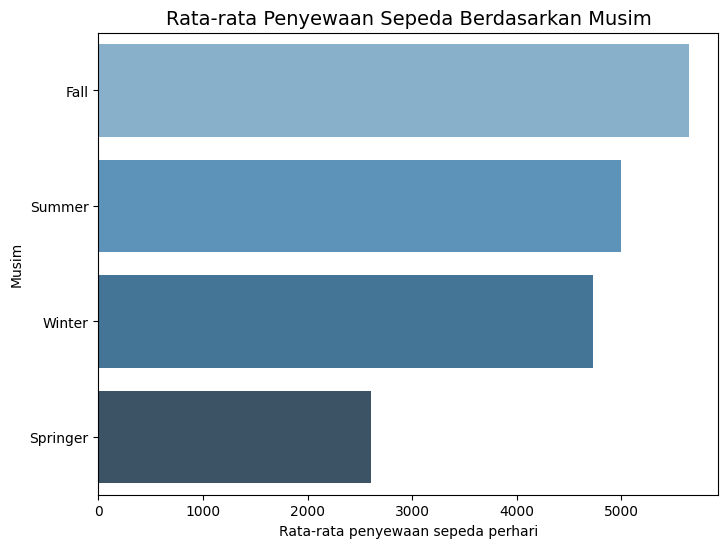

In [17]:
# 1. Mengelompokkan data berdasarkan musim dan menghitung rata-rata penyewaan sepeda per musim
season_avg = day_df.groupby('season')['cnt'].mean().reset_index()

# 2. Menambahkan label musim agar lebih mudah dipahami
season_labels = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_avg['season'] = season_avg['season'].map(season_labels)

# 3. Mengurutkan musim berdasarkan rata-rata penyewaan sepeda
season_avg = season_avg.sort_values(by='cnt', ascending=False)

# 4. Membuat bar chart dengan musim sebagai sumbu x dan rata-rata penyewaan sepeda sebagai sumbu y
plt.figure(figsize=(8, 6))
sns.barplot(x='cnt', y='season', data=season_avg, palette='Blues_d')

# 5. Menambahkan judul dan label
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Rata-rata penyewaan sepeda perhari', fontsize=10)
plt.ylabel('Musim', fontsize=10)
plt.xticks(rotation=0)

# Tampilkan grafik
plt.show()


### Pertanyaan 2:
Bagaimana tren penyewaan sepeda dari bulan dan tahun yang berbeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


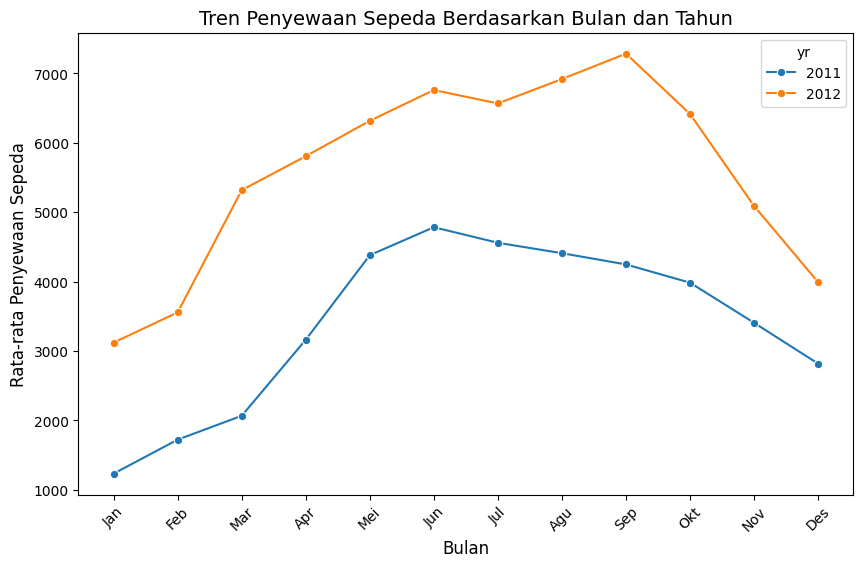

In [16]:
# 1. Mengelompokkan data berdasarkan tahun dan bulan, dan menghitung rata-rata penyewaan sepeda per bulan
monthly_avg = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

# 2. Menambahkan label tahun dan bulan agar lebih deskriptif
year_labels = {0: '2011', 1: '2012'}
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}

monthly_avg['yr'] = monthly_avg['yr'].map(year_labels)
monthly_avg['mnth'] = monthly_avg['mnth'].map(month_labels)

# 3. Membuat line chart untuk tren penyewaan sepeda berdasarkan bulan dan tahun
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=monthly_avg, marker='o')

# 4. Menambahkan judul dan label
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan dan Tahun', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()


**Insight:**
- Dari bar chart rata-rata penyewaan berdasarakan musim, dapat dilihat bahwa Musim dengan rata-rata penyewaan sepeda tertinggi ada pada musim fall, sedangkan terendah pada musim springer.
- Dari line chart tren penyewaan sepeda berdasarkan bulan dan tahun,
Baik dari 2011 dan 2012 memiliki tren penyewaan sepeda yang relatif sama.
Yaitu, pada bulan januari sampai juni tren naik. Lalu, pada juni ke juli turun. Namun, pada 2012 terjadi tren naik lagi dari bulan Juli ke September naik. Akan tetapi ssetelah bulan september lanjut turun seperti pada tahun 2011.

## Conclusion

- Musim sangat memengaruhi penyewaan sepeda, dengan musim gugur menjadi yang paling populer dan musim semi yang paling sedikit diminati.
- Meskipun terdapat pola musiman yang konsisten setiap tahunnya, terdapat sedikit perbedaan pada pertengahan tahun 2012, di mana tren penyewaan sepeda meningkat kembali pada bulan Juli hingga September, yang mungkin disebabkan oleh faktor spesifik di tahun tersebut seperti cuaca atau event tertentu.


Kesimpulan ini dapat membantu dalam memahami pola penyewaan sepeda, sehingga manajemen layanan penyewaan sepeda dapat mengantisipasi lonjakan atau penurunan permintaan sesuai musim dan bulan.

In [18]:
day_df.to_csv("main_data.csv", index=False)